### Logistic Regression

Here we fit a linear function into a sigmoid squishfication function that squishes any value in the range $(0,1)$.

Hypothesis: $h_\theta(x) = \sum_{i=1}^{m}(X_i\theta_i) + \theta_0$

Sigmoid($\sigma(h_\theta(x))$) = $\frac{1}{1 + \exp(-h_\theta(x))}$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score as precision, recall_score as recall, f1_score as f1

class LogisticRegression:
    def __init__(self, learningRate = 0.1, threshold = 0.5, epoch = 1000):
        self.epoch = epoch
        self.threshold = threshold
        self.learningRate = learningRate

        self.weight = self.bias = None

        self.mean = self.std = None
    
    def train(self, x: np.ndarray, y: np.ndarray):
        [m, n] = x.shape
        
        self.bias = 0
        self.weight = np.zeros((n, 1))
        self.cost = np.zeros(self.epoch)

        self.mean = x.mean(axis=0)
        self.std = x.std(axis=0)

        self.std[self.std == 0] = 1 # prevent zero division

        x = (x - self.mean) / self.std
        y = y.reshape((-1,1))

        for i in range(self.epoch):
            if i != 0 and i % 500 == 0:
                print(f"[i] Completed {i} epochs")

            hx = x @ self.weight + self.bias
            y_pred = 1 / (1 + np.exp(-hx))

            error = y_pred - y

            dw = (x.T @ error) / m
            db = np.sum(error) / m

            self.weight -= self.learningRate * dw
            self.bias -= self.learningRate * db

            self.cost[i] = -(y.T @ np.log(y_pred) + (1 - y).T @ np.log(1 - y_pred)).item() / m
    
    def predict(self, x:np.ndarray):
        if self.weight is None or self.bias is None or self.mean is None or self.std is None:
            raise Exception("Please train the model first before prediction")
        
        # assuming no. of features match
        x = (x - self.mean) / self.std
        hx = x @ self.weight + self.bias
        y_pred = 1 / (1 + np.exp(-hx))

        y_pred_classified = (y_pred >= self.threshold).astype(int)

        return y_pred_classified
    
    def test(self, x:np.ndarray, y: np.ndarray):
        if self.weight is None or self.bias is None or self.mean is None or self.std is None:
            raise Exception("Please train the model first before prediction")
        
        y_pred = self.predict(x)

        return {
            "f1": f1(y, y_pred),
            "recall": recall(y, y_pred),
            "precision": precision(y, y_pred),
        }

    def plot_cost(self):
        if self.weight is None or self.bias is None or self.cost is None:
            raise Exception("Please train the model before plotting cost")
        
        x = np.arange(self.epoch)
        y = self.cost

        plt.plot(x, y, label="Cost Function", color="skyblue")

        plt.xlabel("Iterations")
        plt.ylabel("Cost")

        plt.grid(alpha=0.4)
        plt.legend()

        plt.show()

In [50]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

[x, y] = load_breast_cancer(return_X_y=True)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4)

In [56]:
model = LogisticRegression(threshold=0.3, epoch=100)
model.train(x_train, y_train)

In [57]:
print(model.test(x_test, y_test))

{'f1': 0.9844559585492227, 'recall': 1.0, 'precision': 0.9693877551020408}


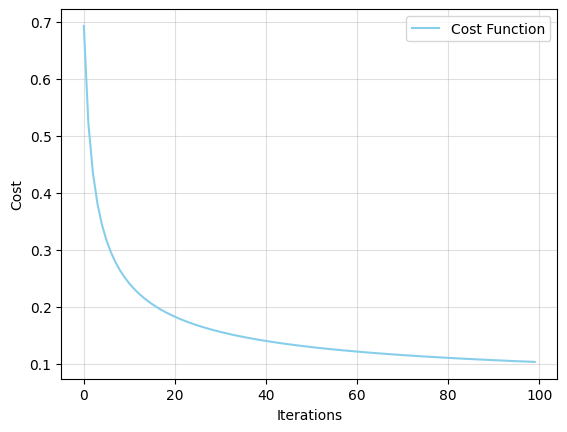

In [58]:
model.plot_cost()